In [1]:
import os
from pathlib import Path
from IPython.core.display import Image
from dotenv import load_dotenv
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import MessagesState, StateGraph, START

envPath = Path().cwd().parent.joinpath("sample.env")
load_dotenv(override=True, dotenv_path=envPath)

os.getenv("APP_NAME")
# sqlitePath = Path().cwd().parent.joinpath("db").joinpath("sample.db")
# print(sqlitePath)
sqliteCheckPointer = SqliteSaver("../db/sample.db")
config = {"configurable": {"thread_id": "1"}}

In [2]:
from langchain_openai import ChatOpenAI

model = os.getenv("GPT_MODEL")
llm = ChatOpenAI(model=model)
tools = []
llm_with_tools = llm.bind_tools(tools)

In [3]:

class BotState(MessagesState):
    chat_summary: str

def assistant(state: BotState):
    return {"messages": llm_with_tools.invoke(state["messages"])}

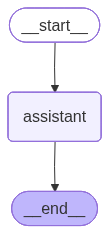

In [4]:
from langgraph.constants import START

g = StateGraph(BotState)

g.add_node(assistant)


g.add_edge(START, "assistant")

graph = g.compile(checkpointer=sqliteCheckPointer)

display(Image(graph.get_graph().draw_mermaid_png()))


In [5]:
from lib import cliBot, Logmsg
import sys

try:
    cliBot(graphInstance=graph, config=config, show_all_msg=False)
except KeyboardInterrupt as ki:
    print("User choose to exit", file=sys.stderr)
except Exception as e:
    print(e)


'str' object has no attribute 'executescript'
Traceback (most recent call last):
  File "C:\Users\user\Desktop\Projects\personal\langchain_prac\lib.py", line 36, in cliBot
    r = graphInstance.invoke({"messages": humanMessage}, config)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\Desktop\Projects\personal\langchain_prac\.venv\Lib\site-packages\langgraph\pregel\main.py", line 3071, in invoke
    for chunk in self.stream(
  File "C:\Users\user\Desktop\Projects\personal\langchain_prac\.venv\Lib\site-packages\langgraph\pregel\main.py", line 2582, in stream
    with SyncPregelLoop(
  File "C:\Users\user\Desktop\Projects\personal\langchain_prac\.venv\Lib\site-packages\langgraph\pregel\_loop.py", line 1085, in __enter__
    saved = self.checkpointer.get_tuple(self.checkpoint_config)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\Desktop\Projects\personal\langchain_prac\.venv\Lib\site-packages\langgraph\checkpoin